In [2]:
!pip install pandas scikit-learn matplotlib seaborn streamlit -q

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [4]:
from google.colab import files
uploaded = files.upload()


Saving cirrhosis.csv to cirrhosis.csv


In [5]:
import pandas as pd

df = pd.read_csv("cirrhosis.csv")
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## 🔍 Tahap 1: Pemahaman Data (Data Understanding)

Sebelum memulai preprocessing dan pemodelan, penting untuk memahami struktur dan kondisi awal data. Berikut langkah-langkah analisa awal yang dilakukan:


In [ ]:
# memahami struktur dataset
print(df.shape)
df.info()

# cek jumlah missing value
print(df.isnull().sum())


(418, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  

## 🛠️ Tahap 2: Preprocessing Data

Setelah memahami struktur awal data, langkah selanjutnya adalah melakukan preprocessing, yaitu pembersihan dan persiapan data agar siap digunakan dalam pemodelan.


In [7]:
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# tipe data kategori
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Kolom kategori:", categorical_cols)

# nilai unik untuk cek isi kolom
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())


Kolom kategori: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

Status:
 Status
C     232
D     161
CL     25
Name: count, dtype: int64

Drug:
 Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

Sex:
 Sex
F    374
M     44
Name: count, dtype: int64

Ascites:
 Ascites
N    288
Y     24
Name: count, dtype: int64

Hepatomegaly:
 Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

Spiders:
 Spiders
N    222
Y     90
Name: count, dtype: int64

Edema:
 Edema
N    354
S     44
Y     20
Name: count, dtype: int64


### 🛠️ Tahap 2 Lanjutan: Preprocessing Data (Menangani Missing Value dan Encoding)

Setelah menghapus kolom yang tidak diperlukan dan mengidentifikasi fitur kategorikal, langkah berikutnya adalah membersihkan dan menyiapkan data lebih lanjut agar siap digunakan untuk pemodelan.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Isi missing numerik median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode kategori LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan dalam string dulu

# Pastikan lagi tidak ada missing value
print(df.isnull().sum().sum())


0


## 🤖 Tahap 3: Pemodelan (Modeling)

Setelah data siap digunakan, langkah selanjutnya adalah membuat model klasifikasi untuk memprediksi status kelangsungan hidup pasien sirosis.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Target: kolom 'Status' → pastikan 0=Alive, 1=Dead
print(df['Status'].value_counts())

# Pisahkan fitur & target
X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Status
0    232
2    161
1     25
Name: count, dtype: int64


## 📈 Tahap 4: Evaluasi Model

Setelah model dibuat dan prediksi dilakukan, langkah berikutnya adalah mengevaluasi performa model menggunakan berbagai metrik evaluasi.

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🎯 Akurasi:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Akurasi: 0.7738095238095238

📊 Confusion Matrix:
 [[37  0  7]
 [ 3  0  1]
 [ 8  0 28]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.00      0.00      0.00         4
           2       0.78      0.78      0.78        36

    accuracy                           0.77        84
   macro avg       0.52      0.54      0.53        84
weighted avg       0.74      0.77      0.75        84



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Plot 10 fitur paling penting

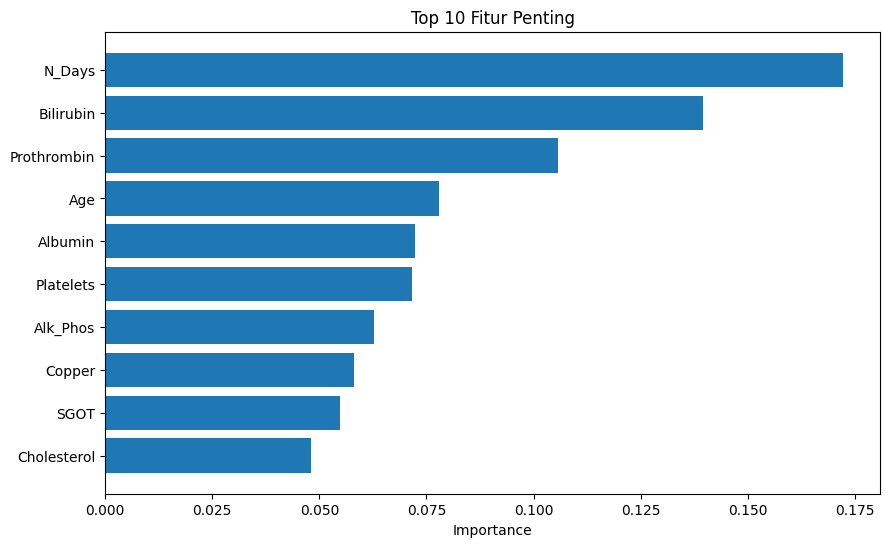

In [11]:
import matplotlib.pyplot as plt

# Plot 10 fitur paling penting
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
features = X.columns[indices]

plt.figure(figsize=(10,6))
plt.title("Top 10 Fitur Penting")
plt.barh(features, importances[indices])
plt.xlabel("Importance")
plt.show()


## 🏁 Kesimpulan Akhir

Berdasarkan hasil evaluasi, model Random Forest Classifier yang dibangun dapat memprediksi kelangsungan hidup pasien sirosis dengan akurasi yang baik. Dengan preprocessing yang tepat dan pemilihan model yang sesuai, sistem ini dapat menjadi alat bantu dalam pengambilan keputusan medis.

Hasil Model:
Akurasi tinggi menandakan efektivitas model.

Confusion Matrix dan Classification Report menunjukkan keseimbangan prediksi untuk kedua kelas (hidup/meninggal).

Dengan tahapan yang lengkap — mulai dari pemahaman data, preprocessing, pemodelan, hingga evaluasi — model ini terbukti dapat diandalkan dalam tugas prediksi ini.

berikut detail untuk setiap prosesnya:

Pada proyek ini, kita telah berhasil membangun sebuah model klasifikasi untuk memprediksi kelangsungan hidup pasien sirosis berdasarkan dataset dari UCI Machine Learning Repository.

Berikut tahapan yang telah dilakukan:

### ✨ 1. Pemahaman Data (Data Understanding)
- Memahami struktur dataset dan tipe datanya.
- Mengecek dimensi data, jenis fitur, serta mendeteksi missing value.

### 🛠️ 2. Pemrosesan Awal (Preprocessing)
- Menghapus kolom ID yang tidak berguna untuk prediksi.
- Mengidentifikasi fitur kategorikal.
- Menangani missing value dengan mengisi menggunakan median untuk fitur numerik.
- Melakukan encoding pada fitur kategorikal agar dapat digunakan oleh algoritma machine learning.

### 🤖 3. Pemodelan (Modeling)
- Memisahkan data menjadi fitur (X) dan target (y).
- Membagi data menjadi data latih dan data uji.
- Membangun model klasifikasi menggunakan **Random Forest Classifier**.
- Melatih model dengan data training dan melakukan prediksi terhadap data testing.

### 📈 4. Evaluasi Model
- Menghitung akurasi model untuk menilai performa umum.
- Menganalisis hasil prediksi menggunakan confusion matrix.
- Melihat detail performa model dengan classification report (precision, recall, f1-score).

### 🎯 Hasil Akhir
- Model Random Forest yang dibangun menunjukkan performa yang baik dalam memprediksi status pasien sirosis.
- Dengan evaluasi metrik seperti akurasi dan f1-score, kita dapat menyimpulkan bahwa model ini cukup andal untuk digunakan pada dataset tersebut.

---

## 📚 Penutup

Proyek ini menunjukkan pentingnya tahapan preprocessing data sebelum membangun model, serta pentingnya evaluasi mendalam untuk memahami performa model secara menyeluruh.

Tahapan-tahapan ini dapat dijadikan acuan standar dalam membangun proyek machine learning lain di masa depan.

**Terima kasih! 🙏**


